In [1]:
!pip install torch
!pip install pathlib
!pip install transformers
!pip install scipy
!pip install urllib
!pip install csv

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

import torch
import torch.nn.functional as F

## Test Baseline

In [3]:
import pandas as pd
df = pd.read_csv(r"allfiles.csv")
df

,Unnamed: 0,doc_id,text,is_hate
0,0,12834217_1,"As of March 13th , 2014 , the booklet had been...",0
1,1,12834217_10,Thank you in advance. : ) Download the youtube...,0
2,2,12834217_2,In order to help increase the booklets downloa...,0
3,3,12834217_3,( Simply copy and paste the following text int...,0
4,4,12834217_4,Click below for a FREE download of a colorfull...,1
...,...,...,...,...
10939,10939,33677015_1,Apparently he came to the conclusion that his ...,0
10940,10940,33677019_1,Wish we at least had a Marine Le Pen to vote f...,0
10941,10941,33677019_2,Its like the choices are white genocide candid...,0
10942,10942,33677053_1,Why White people used to say that sex was a si...,1


In [4]:
df.is_hate.sum() / len(df)

0.10928362573099415

In [5]:
pd.set_option("max_colwidth", 100)
df[df.is_hate == 1]

,Unnamed: 0,doc_id,text,is_hate
4,4,12834217_4,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engin...,1
12,12,12834278_3,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engin...,1
19,19,12834493_1,"She may or may not be a Jew but she 's certainly stupid , she seems to think the Blacks wo n't k...",1
21,21,12834922_2,God knows what would come out of Africa if only blacks could come up with investigative journali...,1
24,24,12835050_1,I'm insulted by how stupid the Jews think we are until I see what they see by reading the posts ...,1
...,...,...,...,...
10902,10902,33633437_1,Meanwhile those nonwhites continue to breed even as their nonwhite societies continue to inflict...,1
10904,10904,33633437_3,Their nonwhite societies are failing in every area and yet they are trying to force White civili...,1
10922,10922,33645552_1,We can turn the cold useless parts of Canada into a dumping ground for Jews and arm the Indians ...,1
10929,10929,33661937_1,I would move too but unfortunately there is nowhere that is untainted .,1


In [6]:
max([len(str(i).split(" ")) for i in list(df.text)])

349

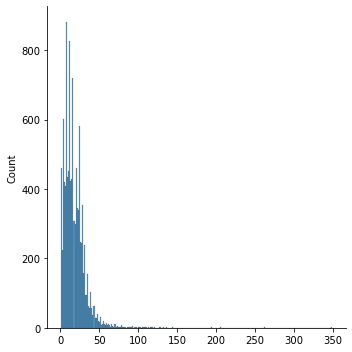

In [7]:
import seaborn as sns
sns.displot([len(str(i).split(" ")) for i in list(df.text)])

In [23]:
#avoid max length 
# df = df.drop(df[df.text.apply(lambda x: len(str(x).split(" "))) > 300].index)
df

,Unnamed: 0,doc_id,text,is_hate
0,0,12834217_1,"As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .",0
1,1,12834217_10,Thank you in advance. : ) Download the youtube `` description box '' info text file below @ http...,0
2,2,12834217_2,"In order to help increase the booklets downloads , it would be great if all Stormfronters who ha...",0
3,3,12834217_3,( Simply copy and paste the following text into your YouTube videos description boxes. ),0
4,4,12834217_4,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engin...,1
...,...,...,...,...
10939,10939,33677015_1,"Apparently he came to the conclusion that his French was too poor to win over Quebec , and thus ...",0
10940,10940,33677019_1,Wish we at least had a Marine Le Pen to vote for in Canada .,0
10941,10941,33677019_2,"Its like the choices are white genocide candidate 1 , 2 , or 3",0
10942,10942,33677053_1,Why White people used to say that sex was a sin used to be a mystery to me until I saw the child...,1


In [8]:
model_name = "finiteautomata/bertweet-base-sentiment-analysis"    
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

id2del = [3400] # df.text[3400] == nan

for i in range(len(df)//2):
    if i != 3400:
        tokens = tokenizer.encode_plus(df.text[i], add_special_tokens=False,
                                   return_tensors='pt')
        if len(tokens['input_ids'][0]) >= 128:
               id2del.append(i)
id2del

Token indices sequence length is longer than the specified maximum sequence length for this model (282 > 128). Running this sequence through the model will result in indexing errors


[3400,
 8,
 16,
 327,
 1700,
 1701,
 1750,
 1772,
 1775,
 1847,
 2419,
 3343,
 4143,
 4214,
 4352,
 4451]

In [9]:
df = df.drop(id2del)

In [10]:
df

,Unnamed: 0,doc_id,text,is_hate
0,0,12834217_1,"As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .",0
1,1,12834217_10,Thank you in advance. : ) Download the youtube `` description box '' info text file below @ http...,0
2,2,12834217_2,"In order to help increase the booklets downloads , it would be great if all Stormfronters who ha...",0
3,3,12834217_3,( Simply copy and paste the following text into your YouTube videos description boxes. ),0
4,4,12834217_4,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engin...,1
...,...,...,...,...
10939,10939,33677015_1,"Apparently he came to the conclusion that his French was too poor to win over Quebec , and thus ...",0
10940,10940,33677019_1,Wish we at least had a Marine Le Pen to vote for in Canada .,0
10941,10941,33677019_2,"Its like the choices are white genocide candidate 1 , 2 , or 3",0
10942,10942,33677053_1,Why White people used to say that sex was a sin used to be a mystery to me until I saw the child...,1


In [20]:
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Good night 😊"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]

scores

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

array([0.00760988, 0.14581233, 0.8465777 ], dtype=float32)

In [23]:
scores

array([0.00760988, 0.14581233, 0.8465777 ], dtype=float32)

In [25]:
labels

['negative', 'neutral', 'positive']

In [29]:
result = []
for text in list(df.text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    result.append(scores)

In [30]:
result.count

[array([0.08821643, 0.75136507, 0.16041854], dtype=float32),
 array([0.00249648, 0.09886477, 0.89863867], dtype=float32),
 array([0.00700094, 0.18586999, 0.80712897], dtype=float32),
 array([0.06251474, 0.847002  , 0.09048327], dtype=float32),
 array([0.49004766, 0.45614412, 0.05380812], dtype=float32),
 array([0.11726023, 0.8229754 , 0.05976443], dtype=float32),
 array([0.01594579, 0.92450625, 0.05954801], dtype=float32),
 array([0.01309073, 0.7096821 , 0.27722725], dtype=float32),
 array([0.17591903, 0.7721691 , 0.05191193], dtype=float32),
 array([0.0396906 , 0.87192494, 0.08838453], dtype=float32),
 array([0.00700094, 0.18586999, 0.80712897], dtype=float32),
 array([0.49004766, 0.45614412, 0.05380812], dtype=float32),
 array([0.14074063, 0.798101  , 0.06115839], dtype=float32),
 array([0.01412433, 0.9245675 , 0.06130814], dtype=float32),
 array([0.01617876, 0.5986919 , 0.3851294 ], dtype=float32),
 array([0.17591903, 0.7721691 , 0.05191193], dtype=float32),
 array([0.00408367, 0.16

In [36]:
y_pred = []
for i in result:
    if np.argmax(i) == 0:
        y_pred.append(1)
    if np.argmax(i) == 1:
        y_pred.append(0)
    if np.argmax(i) == 2:
        y_pred.append(0)

In [37]:
y_pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [38]:
y_truth = list(df.is_hate)

In [41]:
from sklearn.metrics import f1_score
print(f1_score(y_truth, y_pred, average="macro"))
f1_score(y_truth, y_pred, average="binary")

0.5963588455879234


0.372561100842062

In [42]:
sum([1 if y_truth[i] == y_pred[i] else 0 for i in range(len(y_pred))]) / len(y_pred)

0.7204428989751098